In [2]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
from scipy import ndimage
import skimage

from scipy import ndimage
import matplotlib.pyplot as plt

In [5]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 59
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp


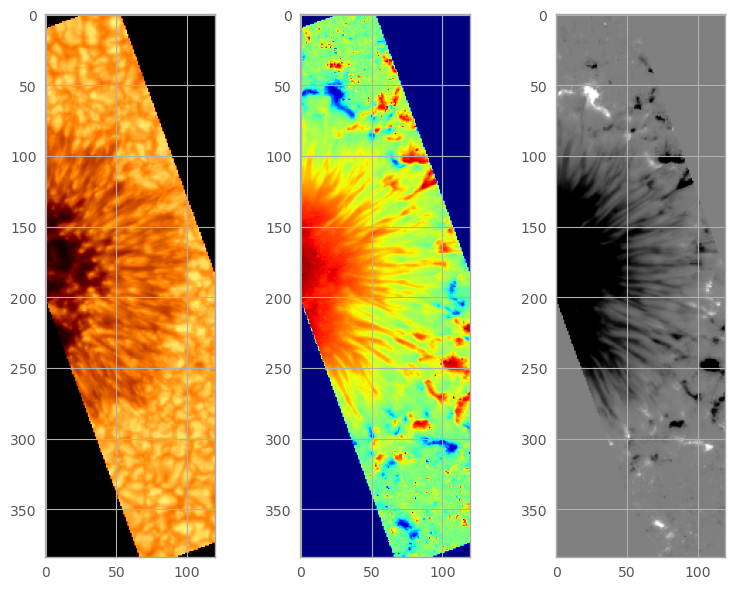

In [7]:
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,0], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,0], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

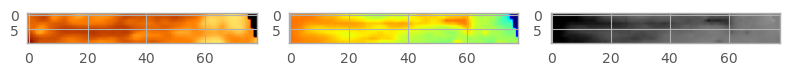

In [37]:
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[174:184,42:,0], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[174:184,42:,0], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[174:184,42:,0], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

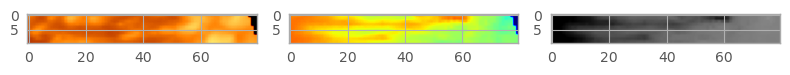

In [38]:
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[175:185,40:,1], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[175:185,40:,1], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[175:185,40:,1], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

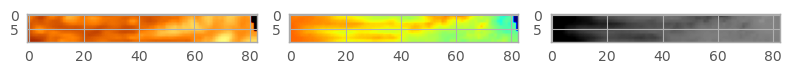

In [40]:
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[176:186,37:,2], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[176:186,37:,2], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[176:186,37:,2], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

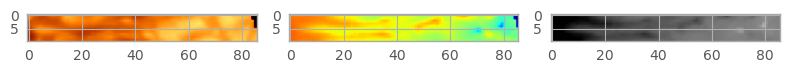

In [41]:
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[177:187,34:,3], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[177:187,34:,3], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[177:187,34:,3], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

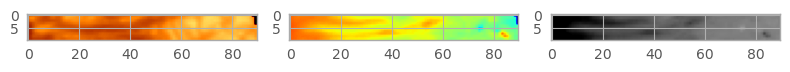

In [33]:
dc_rot = ndimage.rotate(data_conti, 20, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 20, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 20, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[178:188,30:,4], cmap='afmhot', vmin=3e3, vmax=20e3)
#ax[0].set_axis_off()
ax[1].imshow(mi_rot[178:188,30:,4], cmap='jet',  vmin=0, vmax=180)
#ax[1].set_axis_off()
ax[2].imshow(bz_rot[178:188,30:,4], cmap='gray', vmin=-1250, vmax=1250)
#ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

In [46]:
#continuum intensity
dc_rot[178:188,30:,4][5][0:40]

array([ 7984.15582399,  8624.8118116 ,  9913.26064393, 11137.93286859,
       11720.72644863, 11939.82614646, 11963.24542644, 11686.25091893,
       11415.06354318, 10926.05603905, 10699.98691363, 10571.83445506,
       10248.84990763, 10008.9308235 ,  9918.8128275 ,  9897.78337484,
        9823.85025731,  9745.4784082 ,  9677.9330271 ,  9648.8106865 ,
        9644.15415489,  9581.07287193,  9441.72533845,  9373.95413249,
        9243.2566968 ,  9195.41783034,  9082.46597144,  9078.90870938,
        8956.62718099,  8961.93067124,  9109.44969711,  9205.38026175,
        9231.29417027,  9195.84040738,  9185.22390558,  9144.53551399,
        9148.63295049,  9280.36765651,  9401.60601964,  9330.99483881])

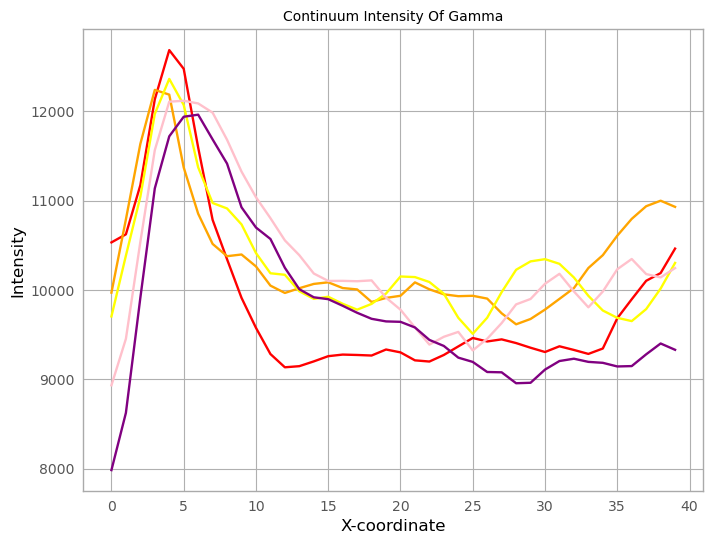

In [47]:
#vertical index [5]
dc_y0 = np.array([10533.21480376, 10623.61697113, 11173.87904795, 12134.50805755,
       12685.87397788, 12476.59095343, 11596.04502649, 10785.67939934,
       10344.21130885,  9912.88372283,  9576.85653823,  9283.76839379,
        9135.13601196,  9147.74224298,  9201.14757737,  9259.63147161,
        9277.44989699,  9273.09420215,  9266.84763419,  9334.29623958,
        9302.12587251,  9212.9107566 ,  9199.58606571,  9273.2430372 ,
        9368.87661937,  9463.29103458,  9424.37137592,  9447.74580263,
        9406.3295655 ,  9354.13417998,  9306.24750559,  9370.34651646,
        9329.27154632,  9284.93116729,  9345.35567668,  9683.94661768,
        9896.89586161, 10103.40813785, 10189.95229435, 10463.94215531])
dc_x0 = range(0,40)

#vertical index [5]
dc_y1 = np.array([ 9970.92420703, 10790.69584355, 11636.16190198, 12240.63627381,
       12187.45377778, 11372.09958134, 10854.53801661, 10516.26547623,
       10378.8360398 , 10397.99306094, 10264.28560691, 10049.61686873,
        9967.28330015, 10020.45281341, 10068.38004747, 10086.53746264,
       10022.27614847, 10006.91812516,  9866.38614702,  9911.86899499,
        9935.76413518, 10085.86741967, 10007.99094197,  9952.18147829,
        9931.27466482,  9935.63909682,  9904.17604484,  9739.35503303,
        9616.38499462,  9676.03960378,  9781.35667229,  9901.06819398,
       10021.53078908, 10246.43825617, 10390.32242215, 10608.50752011,
       10796.73146452, 10938.35241939, 11000.05634027, 10930.99479424])
dc_x1 = range(0,40)

#vertical index [5]
dc_y2 = np.array([ 9704.50054424, 10385.03330823, 11044.08184872, 11971.82068837,
       12363.76330593, 12071.42614236, 11373.86014253, 10974.4540216 ,
       10913.12597717, 10734.9215662 , 10414.02849499, 10187.74146626,
       10170.73567007,  9985.92168179,  9901.14824795,  9924.90915497,
        9846.11373231,  9780.21651017,  9844.8984858 ,  9960.40984912,
       10151.6704094 , 10145.07937327, 10089.73288075,  9958.72583417,
        9689.32092252,  9509.87630637,  9690.23696951,  9976.48391161,
       10226.79249378, 10320.83300683, 10345.65074012, 10293.27533546,
       10140.37462094,  9935.47990191,  9770.78605765,  9688.82296413,
        9652.29335982,  9786.81651004, 10016.22014976, 10303.59730639])
dc_x2 = range(0,40)

#vertical index [5]
dc_y3 = np.array([ 8933.38750574,  9453.89824316, 10539.10234732, 11565.97213041,
       12108.35304691, 12118.88847581, 12088.94692777, 11985.68962316,
       11682.04720135, 11326.20698467, 11039.10897625, 10804.7759988 ,
       10555.93839002, 10389.90757368, 10184.99899529, 10101.87924585,
       10102.74881682, 10098.64531756, 10107.91881037,  9914.82348153,
        9780.04430318,  9581.48950598,  9389.43878135,  9476.69362334,
        9531.37547582,  9324.32436864,  9454.67342133,  9630.1049595 ,
        9839.22769639,  9900.06022653, 10070.24673164, 10181.54968057,
        9984.40511826,  9806.70229983,  9983.22379794, 10232.79353994,
       10347.59578256, 10178.76824508, 10141.2478544 , 10245.75730769])
dc_x3 = range(0,40)

#vertical index[5]
dc_y4 = np.array([ 7984.15582399,  8624.8118116 ,  9913.26064393, 11137.93286859,
       11720.72644863, 11939.82614646, 11963.24542644, 11686.25091893,
       11415.06354318, 10926.05603905, 10699.98691363, 10571.83445506,
       10248.84990763, 10008.9308235 ,  9918.8128275 ,  9897.78337484,
        9823.85025731,  9745.4784082 ,  9677.9330271 ,  9648.8106865 ,
        9644.15415489,  9581.07287193,  9441.72533845,  9373.95413249,
        9243.2566968 ,  9195.41783034,  9082.46597144,  9078.90870938,
        8956.62718099,  8961.93067124,  9109.44969711,  9205.38026175,
        9231.29417027,  9195.84040738,  9185.22390558,  9144.53551399,
        9148.63295049,  9280.36765651,  9401.60601964,  9330.99483881])
dc_x4 = range(0,40)

plt.title("Continuum Intensity Of Gamma")
plt.xlabel("X-coordinate")
plt.ylabel("Intensity")
plt.plot(dc_x0,dc_y0, color="red")
plt.plot(dc_x1,dc_y1, color="orange")
plt.plot(dc_x2,dc_y2, color="yellow")
plt.plot(dc_x3,dc_y3, color="pink")
plt.plot(dc_x4,dc_y4, color="purple")

plt.show()

In [52]:
##magnetic inclinaton
mi_rot[178:188,30:,4][5][0:40]

array([147.74214834, 145.90696754, 144.10746681, 142.42742195,
       139.30537401, 137.11557105, 134.62048661, 131.98641811,
       128.98139927, 126.97579071, 125.58570997, 122.7600742 ,
       120.55495186, 118.51636804, 118.93356554, 118.1275444 ,
       117.12185323, 116.862011  , 117.39255165, 118.06968088,
       117.09089792, 116.54948654, 115.98406608, 115.3981703 ,
       115.04560654, 115.54299269, 114.43040658, 115.12834337,
       116.87990013, 115.18361384, 115.29505371, 114.61919498,
       113.46950956, 111.96204383, 111.59524076, 111.78234854,
       111.96747261, 112.0121373 , 113.2963871 , 114.50552319])

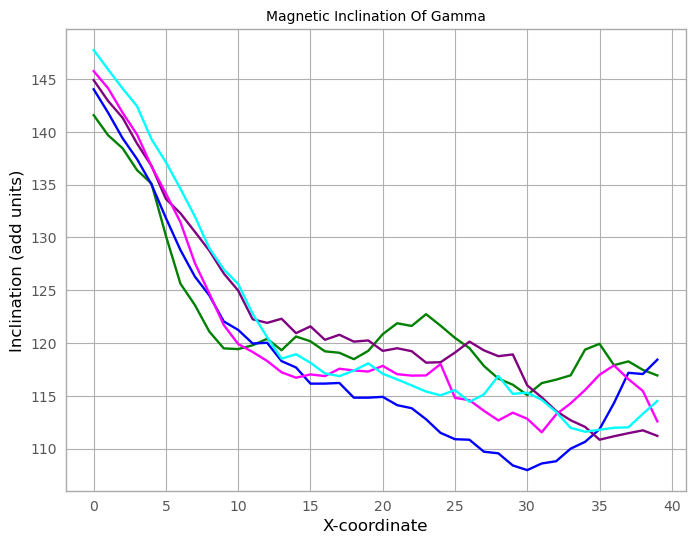

In [53]:
#vertical index [5]
mi_y0 = np.array([141.5792144 , 139.67234598, 138.44569823, 136.37529501,
       135.10091243, 130.133586  , 125.62278607, 123.59858968,
       121.08394185, 119.48802152, 119.4224822 , 119.78616906,
       120.39825945, 119.31580076, 120.61692902, 120.1576859 ,
       119.21107941, 119.07296934, 118.46709888, 119.25926118,
       120.83597867, 121.8679716 , 121.61308196, 122.72886236,
       121.64002391, 120.48026008, 119.51220521, 117.82708917,
       116.6283203 , 116.04802802, 115.06748865, 116.19850296,
       116.52910153, 116.93346465, 119.37137412, 119.92194954,
       117.89923045, 118.25787008, 117.45257497, 116.92576033])
mi_x0 = range(0,40)

#vertical index [5]
mi_y1 = np.array([144.0313528 , 141.80980949, 139.39242566, 137.41981095,
       135.01928537, 131.83274672, 128.8103274 , 126.29273721,
       124.51070536, 122.04441427, 121.23595843, 119.95214931,
       120.02095096, 118.28109422, 117.6808569 , 116.14935312,
       116.15385035, 116.21440135, 114.82096704, 114.82165927,
       114.89728212, 114.11076504, 113.82378933, 112.77350434,
       111.48473641, 110.8874379 , 110.83590106, 109.70282874,
       109.54910322, 108.4001406 , 107.95934843, 108.58803262,
       108.80121586, 109.98965049, 110.63703753, 111.83338903,
       114.30977422, 117.17633673, 117.05924592, 118.42106451])
mi_x1 = range(0,40)

#vertical index [5]
mi_y2 = np.array([144.89535165, 142.9190891 , 141.33512672, 138.89213996,
       136.76873448, 133.63798719, 132.29103013, 130.53596122,
       128.75204472, 126.59020808, 124.96027844, 122.24704523,
       121.90682363, 122.29656672, 120.93187623, 121.57424157,
       120.30086792, 120.7798426 , 120.12991711, 120.24107389,
       119.25172759, 119.50125752, 119.22288674, 118.13982738,
       118.17773728, 119.09468858, 120.13212789, 119.30477853,
       118.74996558, 118.91622533, 115.9840181 , 114.85115782,
       113.55716236, 112.68085426, 112.05228189, 110.83976665,
       111.16431406, 111.45760894, 111.72707726, 111.20221746])
mi_x2 = range(0,40)

#vertical index [5]
mi_y3 = np.array([145.7478735 , 144.12366087, 141.81332195, 139.73983587,
       136.7422973 , 134.14834716, 131.44738271, 127.57728096,
       124.69727218, 121.70428904, 119.90217951, 119.14689188,
       118.29816508, 117.22296576, 116.71187611, 117.02160779,
       116.86452767, 117.56237759, 117.39764581, 117.29722111,
       117.83205595, 117.04586518, 116.91051429, 116.92873191,
       118.00454868, 114.80412309, 114.58270999, 113.57670031,
       112.66666475, 113.39828876, 112.8217511 , 111.54356079,
       113.23656908, 114.28132388, 115.54593513, 116.9943081 ,
       117.87586958, 116.57547794, 115.45289898, 112.57643674])
mi_x3 = range(0,40)

#vertical index [5]
mi_y4 = np.array([147.74214834, 145.90696754, 144.10746681, 142.42742195,
       139.30537401, 137.11557105, 134.62048661, 131.98641811,
       128.98139927, 126.97579071, 125.58570997, 122.7600742 ,
       120.55495186, 118.51636804, 118.93356554, 118.1275444 ,
       117.12185323, 116.862011  , 117.39255165, 118.06968088,
       117.09089792, 116.54948654, 115.98406608, 115.3981703 ,
       115.04560654, 115.54299269, 114.43040658, 115.12834337,
       116.87990013, 115.18361384, 115.29505371, 114.61919498,
       113.46950956, 111.96204383, 111.59524076, 111.78234854,
       111.96747261, 112.0121373 , 113.2963871 , 114.50552319])
mi_x4 = range(0,40)

plt.title("Magnetic Inclination Of Gamma")
plt.xlabel("X-coordinate")
plt.ylabel("Inclination (add units)")
plt.plot(mi_x0,mi_y0, color="green")
plt.plot(mi_x1,mi_y1, color="blue")
plt.plot(mi_x2,mi_y2, color="purple")
plt.plot(mi_x3,mi_y3, color="magenta")
plt.plot(mi_x4,mi_y4, color="cyan")

plt.show()

In [58]:
#Bz plots
bz_rot[178:188,30:,4][5][0:40]

array([-1666.15355693, -1604.23051543, -1569.64680706, -1510.65991608,
       -1360.80912832, -1233.17070315, -1125.23355455,  -987.83445509,
        -867.09619744,  -786.53913434,  -745.08487233,  -676.68215935,
        -640.73543518,  -585.46381694,  -606.38423211,  -586.02720574,
        -565.55550823,  -562.91986098,  -572.2927211 ,  -605.69227122,
        -582.24144569,  -557.20961539,  -533.25197271,  -511.72487598,
        -500.96238526,  -502.23637697,  -461.46630115,  -489.26139904,
        -502.28179514,  -457.07300358,  -461.47245245,  -460.90723762,
        -433.13523238,  -393.23679244,  -393.24089066,  -401.05032696,
        -378.67021708,  -368.93791174,  -378.81007638,  -411.73620533])

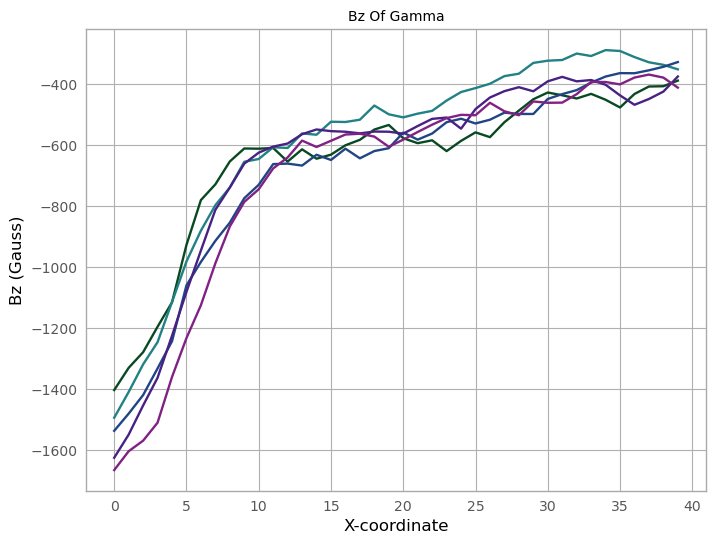

In [59]:
#vertical index [5]
bz_y0 = np.array([-1403.64614175, -1330.80939099, -1279.45456466, -1196.0094185 ,
       -1115.91850135,  -927.67336983,  -780.50913546,  -728.94447038,
        -653.8866984 ,  -611.35115473,  -612.01458848,  -609.59959075,
        -654.21822858,  -614.06767095,  -644.89595758,  -631.54625816,
        -600.81721082,  -582.86098442,  -549.24414522,  -534.20336009,
        -577.58160911,  -593.90660507,  -584.51948715,  -619.93895537,
        -586.32240456,  -558.48954505,  -574.09692069,  -525.17072374,
        -487.14017981,  -449.85023931,  -427.76994708,  -436.74851771,
        -447.39103637,  -432.17770757,  -451.44758345,  -476.81177555,
        -432.56212487,  -408.03001509,  -407.15855781,  -388.7246776 ])
bz_x0 = range(0,40)

#vertical index [5]
bz_y1 = np.array([-1494.33677007, -1409.99992498, -1319.380542  , -1246.53832608,
       -1115.00809503,  -981.92295376,  -880.82044746,  -797.30830169,
        -739.15069513,  -654.91233991,  -645.80223769,  -607.20286719,
        -609.76758773,  -561.90716581,  -566.18181633,  -523.51203689,
        -524.43678958,  -516.98818367,  -470.5059772 ,  -499.20135194,
        -509.27796945,  -497.03367347,  -487.86454157,  -454.15335239,
        -426.20388814,  -413.19896966,  -399.02435827,  -373.99087356,
        -366.03432965,  -330.64797397,  -323.45481834,  -321.0754015 ,
        -299.97646947,  -308.04200967,  -288.67383441,  -291.53285186,
        -311.52023986,  -328.61603935,  -336.95548053,  -351.72742814])
bz_x1 = range(0,40)

#vertical index [5]
bz_y2 = np.array([-1537.28947216, -1480.90712917, -1420.10194949, -1332.63062269,
       -1243.56717555, -1060.18887396,  -983.33327241,  -914.1849092 ,
        -854.51811411,  -774.4165609 ,  -730.39373448,  -662.56028459,
        -660.84723942,  -667.37329954,  -631.93429251,  -648.942802  ,
        -611.98038994,  -643.51422979,  -619.77074002,  -610.36170647,
        -559.14604413,  -582.30471288,  -562.29040133,  -525.13331182,
        -513.69296392,  -529.24907216,  -516.97088088,  -493.81692765,
        -498.06185517,  -498.12351262,  -448.85746439,  -432.96266068,
        -419.92089044,  -395.37689374,  -375.30929303,  -364.16140241,
        -364.5480597 ,  -354.8854291 ,  -343.41373415,  -327.85247563])
bz_x2 = range(0,40)

#vertical index [5]
bz_y3 = np.array([-1625.59244471, -1549.83091421, -1454.24712585, -1363.32850957,
       -1225.52713028, -1081.65403876,  -945.8533622 ,  -812.4930501 ,
        -739.44411215,  -661.11650119,  -624.92141469,  -605.14251001,
        -595.08664207,  -564.52268483,  -548.96071902,  -554.42334982,
        -556.38789535,  -561.74735325,  -555.82080466,  -556.341295  ,
        -562.65883051,  -537.6892722 ,  -514.17912052,  -509.82652193,
        -546.31005889,  -482.17815804,  -444.16606573,  -423.25303507,
        -410.33453799,  -423.69516874,  -391.08510457,  -376.45241446,
        -391.07733016,  -386.81729898,  -402.2323826 ,  -437.10779777,
        -467.98507488,  -449.01325705,  -424.70981372,  -375.21731144])
bz_x3 = range(0,40)
                  
#vertical index [5]
bz_y4 = np.array([-1666.15355693, -1604.23051543, -1569.64680706, -1510.65991608,
       -1360.80912832, -1233.17070315, -1125.23355455,  -987.83445509,
        -867.09619744,  -786.53913434,  -745.08487233,  -676.68215935,
        -640.73543518,  -585.46381694,  -606.38423211,  -586.02720574,
        -565.55550823,  -562.91986098,  -572.2927211 ,  -605.69227122,
        -582.24144569,  -557.20961539,  -533.25197271,  -511.72487598,
        -500.96238526,  -502.23637697,  -461.46630115,  -489.26139904,
        -502.28179514,  -457.07300358,  -461.47245245,  -460.90723762,
        -433.13523238,  -393.23679244,  -393.24089066,  -401.05032696,
        -378.67021708,  -368.93791174,  -378.81007638,  -411.73620533])
bz_x4 = range(0,40)
                  
plt.title("Bz Of Gamma")
plt.xlabel("X-coordinate")
plt.ylabel("Bz (Gauss)")
plt.plot(bz_x0,bz_y0, color="#094922")
plt.plot(bz_x1,bz_y1, color="#218184")
plt.plot(bz_x2,bz_y2, color="#214584")
plt.plot(bz_x3,bz_y3, color="#482184")
plt.plot(bz_x4,bz_y4, color="#802184")

plt.show()